In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [23]:
# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/y값사진.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""
        name =  self.imageid
        file = cv2.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        

    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code

api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


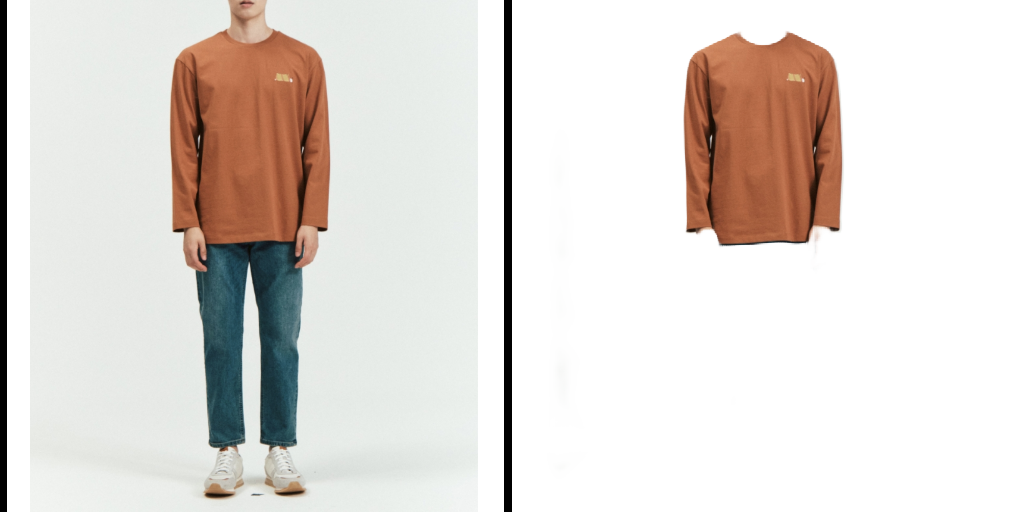

(512, 1024, 4)
(512, 512, 4)


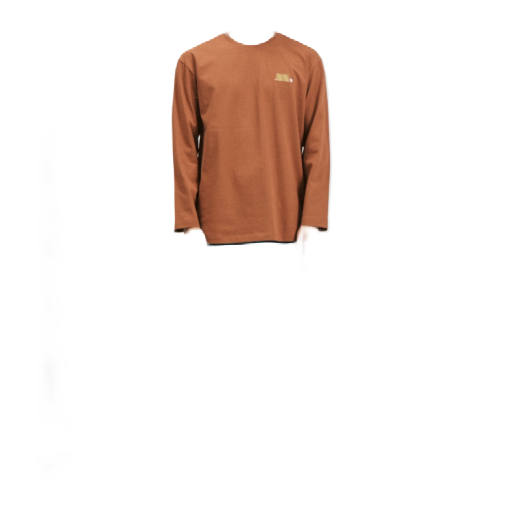

[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [254 254 254   0]
 [255 255 255   0]
 [254 254 254   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [254 254 254   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [255 255 255   0]
 [254 254 254   0]
 [238 241 239   0]
 [237 240 238   0]
 [237 240 238   0]
 [237 240 238   0]
 [238 241 239   0]
 [237 240 238   0]
 [236 239 237   0]
 [235 238 236   0]
 [236 239 237   0]
 [236 239 237   0]
 [236 239 237   0]
 [235 238 236   0]
 [236 239 237   0]
 [236 239 237   0]
 [237 240 238   0]
 [236 239 237   0]
 [235 238 236   0]
 [235 238 236   0]
 [235 238 236   0]
 [236 239 237   0]
 [235 238 236   0]
 [236 239 237   0]
 [236 239 23

In [31]:
# 이미지 자르기...
cv2_imshow(image)
print(image.shape)

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
print(image_crop.shape)
cv2_imshow(image_crop)
print(image_crop[0])

In [38]:
# 리사이즈 후 alpha가 0 이면 다 0 만들어주기.
image_resize = cv2.resize(image_crop, (28,28))
print(image_resize.shape)
for i in image_resize:
    # print(i)
    if i[3] == 0:
        i[:3] = [0,0,0]
    print(i)
    
# print(image_resize)
# cv2_imshow(image_resize)

(28, 28, 4)


ValueError: ignored

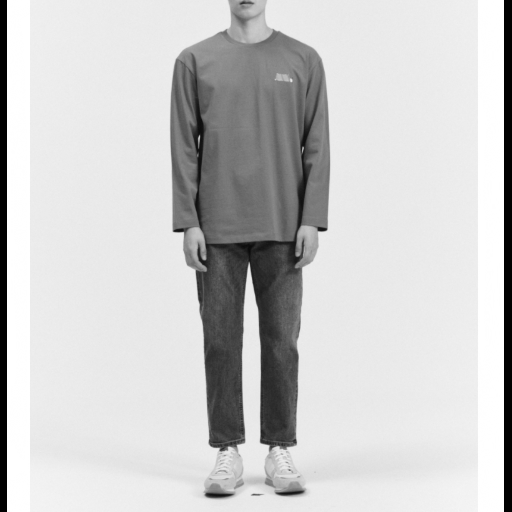

In [11]:
# 그레이 스케일..
image_gray = cv2.cvtColor(image_crop, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)

In [69]:
# 파일로 저장
cv2.imwrite('crop.png' ,image_crop)

True

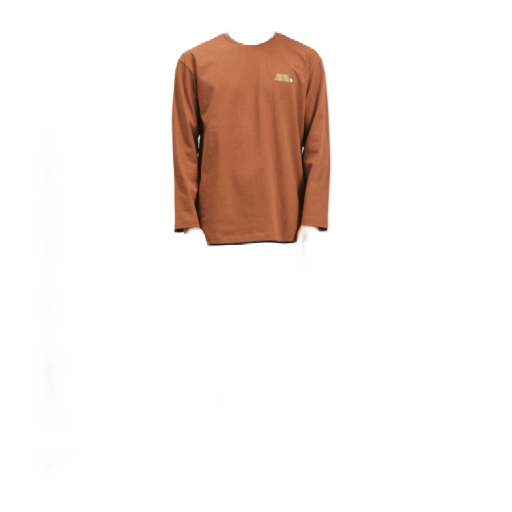

In [14]:
# IMREAD_UNCHANGED 를 사용했더니 제대로 나온다... 옵션값을 잘 찾아보는것도 굉장히 중요!!
img = cv2.imread('crop.png', cv2.IMREAD_UNCHANGED)
# print(img)
cv2_imshow(img)

In [ ]:
# 그레이스케일
img_gray = cv2.cvtColor(image_crop, cv2.COLOR_BGRA2GRAY)

In [63]:
# 리사이즈도 된다...
# resize_img = cv2.resize(image_, (28,28))
# cv2_imshow(resize_img)
# print(resize_img)

# 파일로 저장해줌. 원본 이미지와, 추출된 이미지 나란히...
# cv2.imwrite("out.png",image_)


# alpha값 제거 방법
# alpha값이 제거가 되는 것인지 의문...ㅠ
# b, g, r, a = cv2.split(image_)
# image2 =cv2.merge([b,g,r])
# # cv2_imshow(image2)
# int_img = np.uint8(image2)
# grey_img = cv2.cvtColor(int_img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(grey_img)





# 현재 문제점.. 이미지가 하나의 이미지임.. 두개로 쪼개는 방법은?? 
# print(type(image2))

# grey_img = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# print(grey_img)
# 코랩환경해서 확인하려면... 밑의 코드로 터미널에서 확인가능
# cv2_imshow(image_)

# 픽셀로 출력되는데 숫자가 이상해서.. int화 시켜줌.
# int_image = np.int64(image_)
# print(int_image)
# print(int_image.shape)


# 텍스트 파일로 저장해줄수 있다는데 나는 안됨..? 오류 해결해 봐야한다.
# np.savetxt("pixel_data.txt", image_, fmt='%d', delimiter=" ")

In [ ]:
# 이미지 스플릿 하는 방법.
b, g, r = cv2.split(image)
image2 =cv2.merge([r,g,b])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


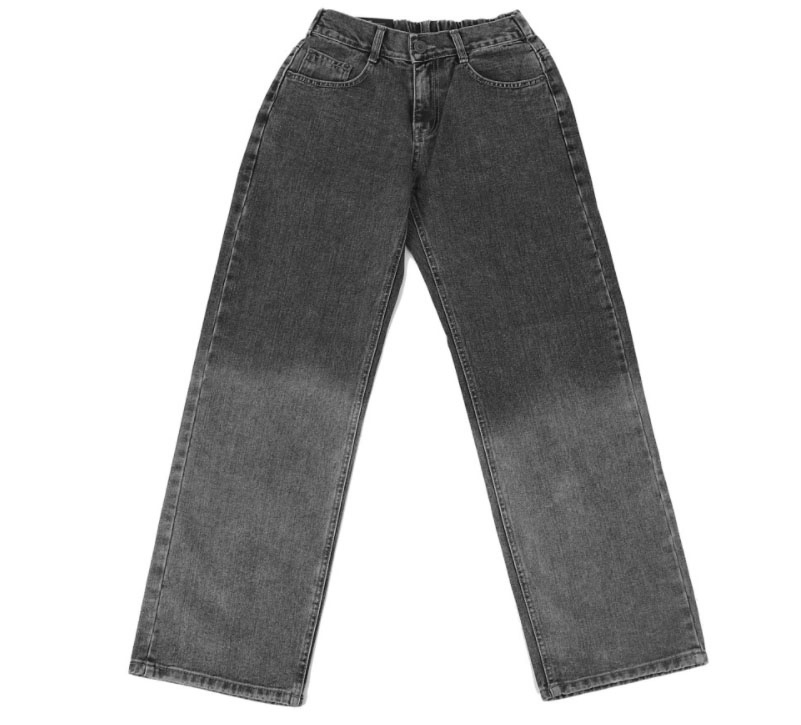

(725, 801)
[[255 255 255 255 255 255 255 255 255 255 255  87 255 255 255 255 255 252
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 251  72  85  36  43  65  56 110
   56 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 254  62 111  87  59 103  46  57  73
   81 253 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  77  76  83  60  61 123  69  56  64
   65  40 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  73  65  71  66  57  74  60  65  60
   66  52 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 253  81  64  63  65  65  76  55  57  57
   73  73 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  58  71  63  64  66  60  47  58  60  64
   74  57  69 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  81  60  59  67  62  74  22  53  64  63
   60  64  72 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  71  67  57  69  75

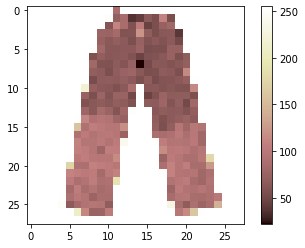

In [7]:
# 이미지 하나로 fashion mnist input값 맞춰주는 방법

img = cv2.imread("/content/청바지.jpg")
# r,g,b = cv2.split(img)
print(img)
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2_imshow(img)

cv2_imshow(grey_img)
# print(grey_img)
# cv2.imshow("src", src)
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(grey_img.shape)

# resize 시켜주기
resize_img = cv2.resize(grey_img, (28,28))
print(resize_img)


plt.imshow(resize_img, cmap='pink')
plt.colorbar()
plt.show()